In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans

In [9]:
# Load your dataset
file_path = 'C:/Users/Rimini/Desktop/Customer Credit Card Task/Credit Card Customer Data.csv'  # Ensure correct path
data = pd.read_csv(file_path)

In [11]:
# Display the first few rows to check the data
print (data.head())

   Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0      1         87073            100000                   2   
1      2         38414             50000                   3   
2      3         17341             50000                   7   
3      4         40496             30000                   5   
4      5         47437            100000                   6   

   Total_visits_bank  Total_visits_online  Total_calls_made  
0                  1                    1                 0  
1                  0                   10                 9  
2                  1                    3                 4  
3                  1                    1                 4  
4                  0                   12                 3  


In [15]:
# Check for missing values
print(data.isnull().sum())

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


In [17]:
# Fill missing values (example: fill with mean)
data.fillna(data.mean(), inplace=True)

In [21]:
# Print column names to ensure we have the correct ones
print(data.columns)

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')


In [23]:
# Normalize data
scaler = StandardScaler()
data[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']] = scaler.fit_transform(data[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']])

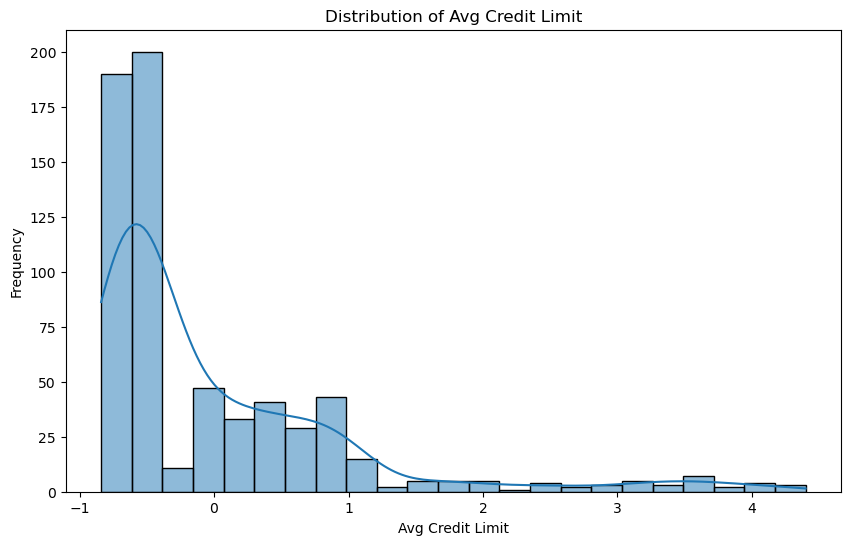

In [27]:
#Distribution of Avg_Credit_Limit
plt.figure(figsize=(10, 6))
sns.histplot(data['Avg_Credit_Limit'], kde=True)
plt.title('Distribution of Avg Credit Limit')
plt.xlabel('Avg Credit Limit')
plt.ylabel('Frequency')
plt.show()

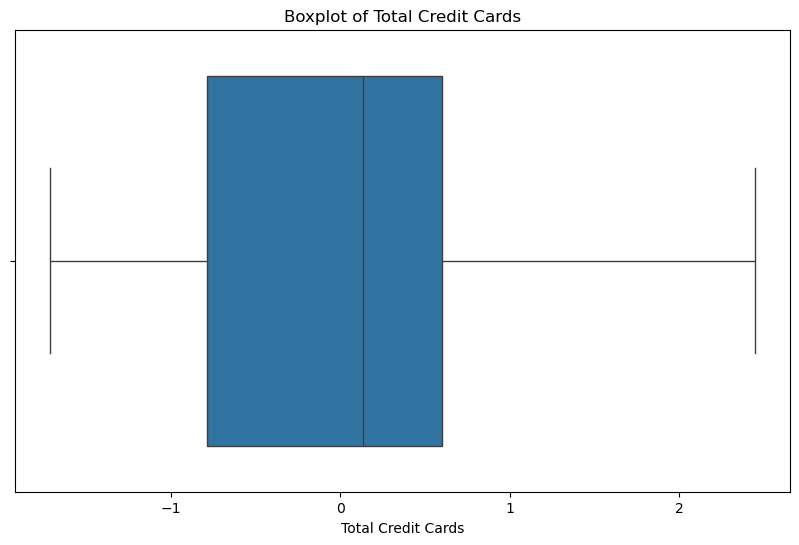

In [29]:
#Boxplot for Total_Credit_Cards
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Total_Credit_Cards'])
plt.title('Boxplot of Total Credit Cards')
plt.xlabel('Total Credit Cards')
plt.show()

In [31]:
# Feature Engineering
# Create a New Feature 'TotalVisits'
data['TotalVisits'] = data['Total_visits_bank'] + data['Total_visits_online']

In [33]:
# Customer Segmentation
# Hierarchical Clustering
hc = AgglomerativeClustering(n_clusters=5)
data['Cluster_HC'] = hc.fit_predict(data[['Avg_Credit_Limit', 'TotalVisits', 'Total_Credit_Cards']])

In [39]:
# K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)

import os
os.environ["OMP_NUM_THREADS"] = "3"

In [43]:
# Create RFM Scores
data['Recency'] = -data['Total_visits_bank']  # Assuming higher visits mean recent activity
data['Frequency'] = data['TotalVisits']
data['Monetary'] = data['Avg_Credit_Limit']

# Standardize RFM values
data[['Recency', 'Frequency', 'Monetary']] = scaler.fit_transform(data[['Recency', 'Frequency', 'Monetary']])


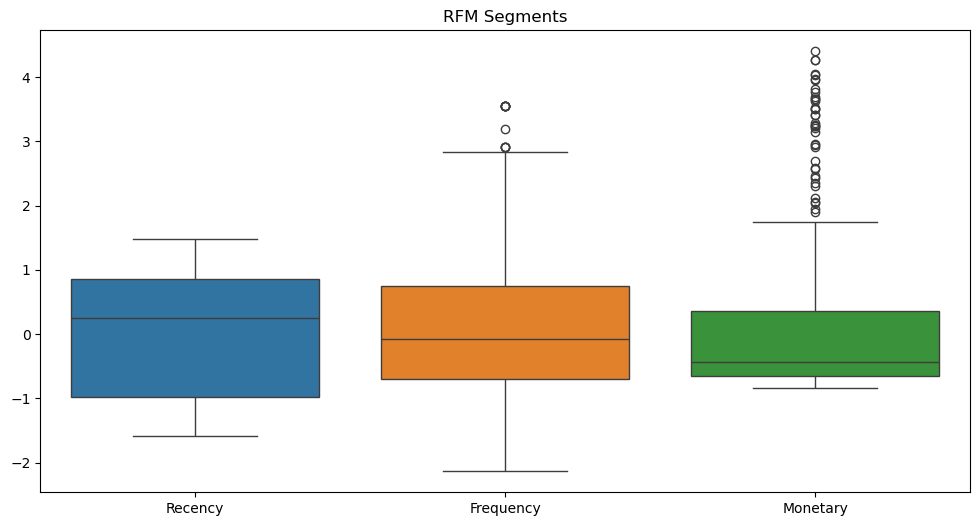

In [45]:
# Plot Recency, Frequency, and Monetary segments to visualize RFM segements
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['Recency', 'Frequency', 'Monetary']])
plt.title('RFM Segments')
plt.show()

In [47]:
# Create RFM scores by ranking the customers
data['RFM_Score'] = data['Recency'] + data['Frequency'] + data['Monetary']

In [51]:
# Segment customers based on RFM score
def segment_rfm(row):
    if row['RFM_Score'] >= 2:
        return 'Loyal'
    elif row['RFM_Score'] > 0:
        return 'Potential'
    else:
        return 'At Risk'

data['RFM_Segment'] = data.apply(segment_rfm, axis=1)

# Count of customers in each segment
print(data['RFM_Segment'].value_counts())

# Strategic actions based on customer segments
# For At Risk Customers:
# - Engage: Implement re-engagement campaigns.
# - Incentives: Offer discounts or special deals to win them back.
# - Feedback: Collect feedback to understand their dissatisfaction.

# For Potential Customers:
# - Nurture: Provide personalized recommendations.
# - Encourage: Highlight benefits to convert them into loyal customers.

# For Loyal Customers:
# - Rewards: Offer loyalty programs or special perks.
# - Referral: Encourage them to refer friends and family.
# - Appreciate: Show appreciation through personalized messages.


RFM_Segment
At Risk      453
Potential    156
Loyal         51
Name: count, dtype: int64
